In [1]:
import drjit as dr
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
from PDE2D.Coefficient import *
from PDE2D.utils import *
from PDE2D.BoundaryShape import *
from PDE2D.Solver import *
from PDE2D import GreenSampling, Split
from mitsuba import Float, Point2f
from PDE2D.utils.imageUtils import *

In [2]:
green = GreenSampling.Polynomial
max_z = 4
use_accelaration = True
newton_steps = 5
weight_window = [0.3, 1.6]

In [3]:
rad = Float(1.0)
source_rad = Float(0.3)
source_val = Float(50.)
source_p = {}
source_p["radius"] = source_rad
source_p["val"] = source_val
def source_generator(points, params):
    return dr.select(dr.norm(points) < params["radius"], params["val"], 0.0)


dirichlet_p = {}
dirichlet_p['freq'] = 2
dirichlet_p['bias'] = 1
def dirichlet_generator(points, params):
    return dr.cos(params['freq'] * dr.atan2(points[0], points[1])) + params["bias"]

In [4]:
s = 1
bbox = [[-1.05 * rad * s, -1.05 * rad * s], [1.05 * rad * s, 1.05 * rad * s]]
resolution_image = [64, 64]
spp_image = 16384
epsilon = 1e-5
out_val = 1

image = np.array([[0,1,2,3,4],
                  [0,1,2,3,4],
                  [0,1,2,3,4],
                  [0,1,2,3,4],
                  [0,1,2,3,4]], dtype = np.float64)

image *= 2
image += out_val
α = DiskTextureCoefficient("diffusion", image, radius = rad, constant_thickness= 0.1, origin = [0,0], out_val = out_val)
dirichlet = FunctionCoefficient("dirichlet", dirichlet_p, dirichlet_generator)
neumann = ConstantCoefficient("neumann",0)
σ = ConstantCoefficient("screening", 0)
f = FunctionCoefficient("source", source_p, source_generator)
shape = CircleShape(origin=Point2f(0., 0.), radius=rad, epsilon= epsilon,dirichlet=[dirichlet])
data_holder = DataHolder(shape = shape, α = α, σ = σ, f=f)
print(data_holder.σ_bar)

[65.9087]


In [5]:
image, _ = data_holder.get_effective_screening()

In [6]:
wos = WosVariable(data_holder, seed = 21, green_sampling=green, max_z = max_z, 
                    newton_steps = newton_steps, use_accelaration=use_accelaration)
points = create_image_points(bbox, resolution_image, spp_image, centered = True)

In [7]:
L_v, _ = wos.solve(points_in = points, split = Split.Naive)
image_v, tensor = create_image_from_result(L_v, resolution_image)

In [8]:
L_vs, _ = wos.solve(points_in = points, split = Split.Normal)
image_vs, tensor = create_image_from_result(L_vs, resolution_image)

0 : 67108864 -> 11541737
1 : 11541737 -> 8451300
2 : 8451300 -> 6259620
3 : 6259620 -> 4641479
4 : 4641479 -> 3445193
5 : 3445193 -> 2554839
6 : 2554839 -> 1894745
7 : 1894745 -> 1405066
8 : 1405066 -> 1039797
9 : 1039797 -> 770474
10 : 770474 -> 572936
11 : 572936 -> 424523
12 : 424523 -> 316246
13 : 316246 -> 234005
14 : 234005 -> 173618
15 : 173618 -> 128967
16 : 128967 -> 95769
17 : 95769 -> 71738
18 : 71738 -> 53167
19 : 53167 -> 39239
20 : 39239 -> 28916
21 : 28916 -> 21298
22 : 21298 -> 15826
23 : 15826 -> 11660
24 : 11660 -> 8649
25 : 8649 -> 6515
26 : 6515 -> 4795
27 : 4795 -> 3386
28 : 3386 -> 2426
29 : 2426 -> 1800
30 : 1800 -> 1343
31 : 1343 -> 1010
32 : 1010 -> 803
33 : 803 -> 612
34 : 612 -> 455
35 : 455 -> 367
36 : 367 -> 273
37 : 273 -> 205
38 : 205 -> 151
39 : 151 -> 125
40 : 125 -> 91
41 : 91 -> 77
42 : 77 -> 54
43 : 54 -> 41
44 : 41 -> 32
45 : 32 -> 17
46 : 17 -> 6
47 : 6 -> 5
48 : 5 -> 3
49 : 3 -> 1
50 : 1 -> 0


In [9]:
L_vsa, _ = wos.solve(points_in = points, split = Split.Agressive)
image_vsa, tensor = create_image_from_result(L_vsa, resolution_image)

0 : 67108864 -> 17493513
1 : 17493513 -> 13389954
2 : 13389954 -> 10207357
3 : 10207357 -> 7790651
4 : 7790651 -> 5942885
5 : 5942885 -> 4538529
6 : 4538529 -> 3465648
7 : 3465648 -> 2648552
8 : 2648552 -> 2021900
9 : 2021900 -> 1542952
10 : 1542952 -> 1177942
11 : 1177942 -> 901510
12 : 901510 -> 686754
13 : 686754 -> 524889
14 : 524889 -> 398715
15 : 398715 -> 304427
16 : 304427 -> 234135
17 : 234135 -> 179055
18 : 179055 -> 137415
19 : 137415 -> 105287
20 : 105287 -> 79995
21 : 79995 -> 61132
22 : 61132 -> 46957
23 : 46957 -> 35919
24 : 35919 -> 27284
25 : 27284 -> 20923
26 : 20923 -> 16213
27 : 16213 -> 12474
28 : 12474 -> 9397
29 : 9397 -> 7505
30 : 7505 -> 5835
31 : 5835 -> 4482
32 : 4482 -> 3478
33 : 3478 -> 2661
34 : 2661 -> 2052
35 : 2052 -> 1511
36 : 1511 -> 1116
37 : 1116 -> 832
38 : 832 -> 656
39 : 656 -> 521
40 : 521 -> 445
41 : 445 -> 342
42 : 342 -> 269
43 : 269 -> 187
44 : 187 -> 131
45 : 131 -> 114
46 : 114 -> 83
47 : 83 -> 66
48 : 66 -> 69
49 : 69 -> 62
50 : 62 -> 27


Text(0.5, 1.0, 'With Split (Agressive)')

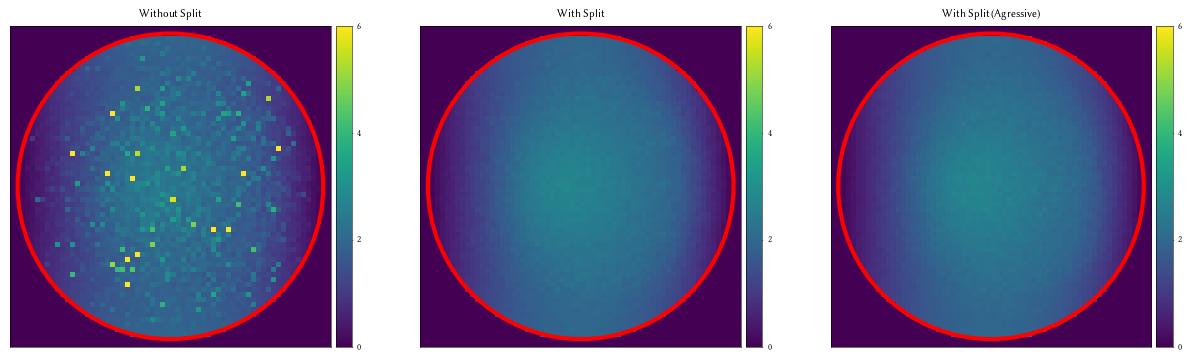

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
plot_image(image_v[0], ax1, input_range =[0,6])
plot_image(image_vs[0], ax2, input_range = [0,6])
plot_image(image_vsa[0], ax3, input_range = [0,6])
shape.sketch(ax1, bbox, resolution_image)
shape.sketch(ax2, bbox, resolution_image)
shape.sketch(ax3, bbox, resolution_image)
ax1.set_title("Without Split")
ax2.set_title("With Split")
ax3.set_title("With Split (Agressive)")

Mean:
-0.031010497
Variance:
0.83818036


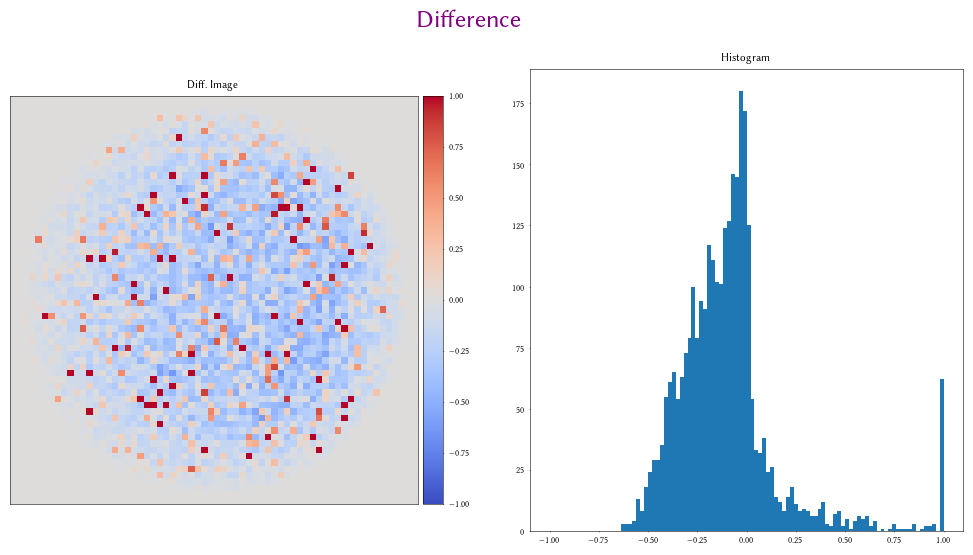

In [11]:
sketch_diff(image_v[0], image_vs[0], max_range = 1)

Mean:
-0.0004294715
Variance:
0.0019979193


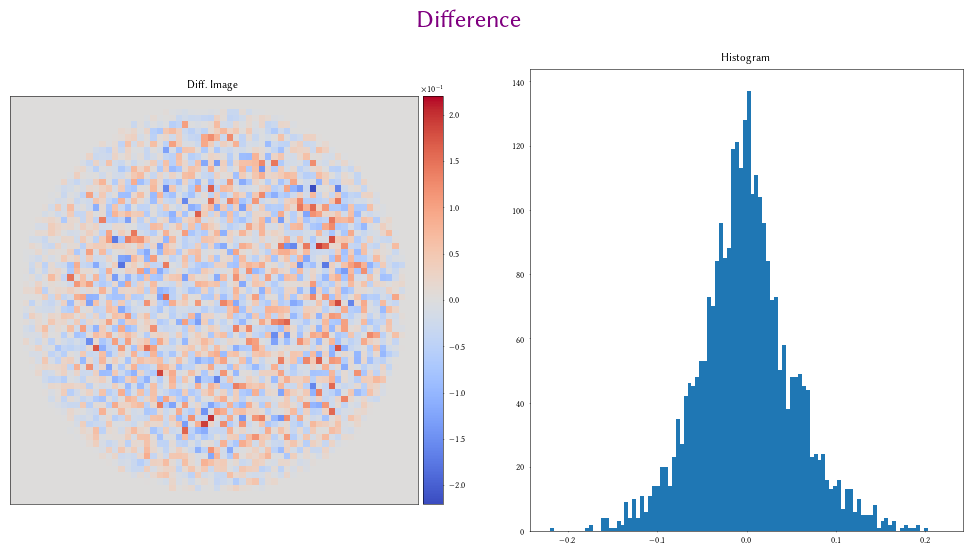

In [12]:
sketch_diff(image_vs[0], image_vsa[0], max_range = 2)

In [13]:
rad_der = 0.9
res = 128
spp_der = 2 ** 16
fd_step = 5e-3
points = create_circle_points(radius = rad_der - 1e-5, resolution = res, spp = spp_der, discrete_points=True)
derivative_dir = points / dr.norm(points)
derivative_dir2 =Point2f(-derivative_dir[1], derivative_dir[0])

In [14]:
derL_v, _ = wos.solve(points_in = points, derivative_dir = derivative_dir, split = Split.Naive)
der_v, _ = create_circle_from_result(derL_v, res)

In [15]:
derL_vs, _ = wos.solve(points_in = points, derivative_dir = derivative_dir, split = Split.Normal)
der_vs, _ = create_circle_from_result(derL_vs, res)

0 : 8388608 -> 395744
1 : 395744 -> 289857


2 : 289857 -> 213547
3 : 213547 -> 158357
4 : 158357 -> 117650
5 : 117650 -> 87658
6 : 87658 -> 65118
7 : 65118 -> 47730
8 : 47730 -> 34963
9 : 34963 -> 25973
10 : 25973 -> 19417
11 : 19417 -> 14091
12 : 14091 -> 10420
13 : 10420 -> 7682
14 : 7682 -> 5688
15 : 5688 -> 4394
16 : 4394 -> 3280
17 : 3280 -> 2467
18 : 2467 -> 1893
19 : 1893 -> 1437
20 : 1437 -> 1029
21 : 1029 -> 786
22 : 786 -> 590
23 : 590 -> 445
24 : 445 -> 279
25 : 279 -> 244
26 : 244 -> 191
27 : 191 -> 149
28 : 149 -> 112
29 : 112 -> 81
30 : 81 -> 61
31 : 61 -> 35
32 : 35 -> 25
33 : 25 -> 13
34 : 13 -> 16
35 : 16 -> 12
36 : 12 -> 6
37 : 6 -> 5
38 : 5 -> 1
39 : 1 -> 3
40 : 3 -> 1
41 : 1 -> 2
42 : 2 -> 3
43 : 3 -> 2
44 : 2 -> 0


In [16]:
derL_vsa, _ = wos.solve(points_in = points, derivative_dir = derivative_dir, split = Split.Agressive)
der_vsa, _ = create_circle_from_result(derL_vsa, res)

0 : 8388608 -> 1048678
1 : 1048678 -> 826447
2 : 826447 -> 629439
3 : 629439 -> 480444
4 : 480444 -> 366693
5 : 366693 -> 279927
6 : 279927 -> 213220
7 : 213220 -> 161978
8 : 161978 -> 123518
9 : 123518 -> 94443
10 : 94443 -> 71833
11 : 71833 -> 55421
12 : 55421 -> 42252
13 : 42252 -> 32817
14 : 32817 -> 25414
15 : 25414 -> 19375
16 : 19375 -> 14940
17 : 14940 -> 11332
18 : 11332 -> 8562
19 : 8562 -> 6458
20 : 6458 -> 4826
21 : 4826 -> 3604
22 : 3604 -> 2862
23 : 2862 -> 2166
24 : 2166 -> 1661
25 : 1661 -> 1312
26 : 1312 -> 1002
27 : 1002 -> 745
28 : 745 -> 582
29 : 582 -> 440
30 : 440 -> 309
31 : 309 -> 234
32 : 234 -> 188
33 : 188 -> 159
34 : 159 -> 105
35 : 105 -> 71
36 : 71 -> 53
37 : 53 -> 33
38 : 33 -> 52
39 : 52 -> 36
40 : 36 -> 15
41 : 15 -> 15
42 : 15 -> 14
43 : 14 -> 7
44 : 7 -> 4
45 : 4 -> 5
46 : 5 -> 7
47 : 7 -> 3
48 : 3 -> 1
49 : 1 -> 2
50 : 2 -> 1
51 : 1 -> 0


Text(0.5, 1.0, 'Radial Derivative Comparison')

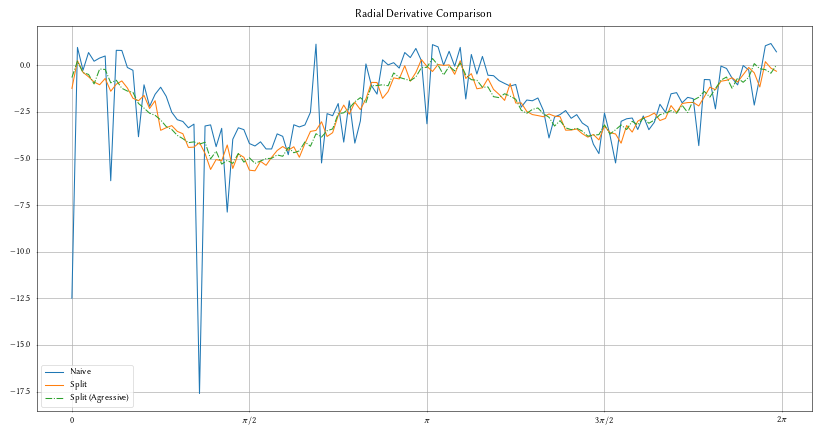

In [17]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
angle = dr.arange(Float, res).numpy() / res * 2 * dr.pi
ax.plot(angle, der_v[0], label = "Naive")
ax.plot(angle, der_vs[0], label = "Split")
ax.plot(angle, der_vsa[0], label = "Split (Agressive)", ls = '-.')
ax.legend()
_ = ax.set_xticks([0, dr.pi/2, dr.pi, 3 * dr.pi / 2, 2 * dr.pi])
_ = ax.set_xticklabels(['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
ax.grid()
ax.set_title("Radial Derivative Comparison")